Introduction to Gaussian States

In [28]:
# First of all we need to import the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D  # 3D projection
from IPython.display import display, clear_output
from numba import njit
from numpy.typing import NDArray

First of all we wish to define our Wigner function as below
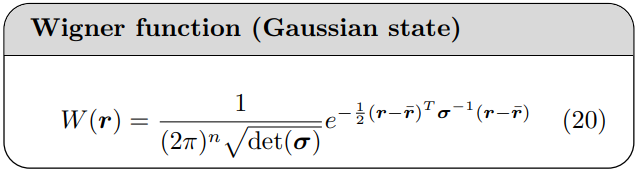

In [54]:
# OLD We define a function to compute the Wigner function for a Gaussian state for n = 1

grid_points = 300
x = np.linspace(-5, 5, grid_points)
p = np.linspace(-5, 5, grid_points)


def wigner_function(x, p, V, d):
    X = np.array([x-d[0], p-d[1]]) # Corresponds to the displacement in phase space
    det_V = np.linalg.det(V)
    inv_V = np.linalg.inv(V)
    exponent = -0.5 * (X.T @ inv_V @ X)
    norm = 1 / (2*np.pi * np.sqrt(det_V)) # Note that we have n = 1
    return norm * np.exp(exponent)



def build_wigner_function(V: NDArray[np.float64], d: NDArray[np.float64]):
    W = np.empty((grid_points, grid_points), dtype=np.float64)

    for i in range(grid_points):
        for j in range(grid_points):
            W[j, i] = wigner_function(x[i], p[j], V, d)
    return W

%timeit build_wigner_function(np.array([[1, 0.5], [0.5, 1]]), np.array([2., -2.]))

1.91 s ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
# OLDNEW We define a function to compute the Wigner function for a Gaussian state for n = 1

grid_points = 300
x = np.linspace(-5, 5, grid_points)
p = np.linspace(-5, 5, grid_points)

@njit
def wigner_function(x, p, V, d):
    X = np.array([x-d[0], p-d[1]]) # Corresponds to the displacement in phase space
    det_V = np.linalg.det(V)
    inv_V = np.linalg.inv(V)
    exponent = -0.5 * (X.T @ inv_V @ X)
    norm = 1 / (2*np.pi * np.sqrt(det_V)) # Note that we have n = 1
    return norm * np.exp(exponent)


@njit
def build_wigner_function(V: NDArray[np.float64], d: NDArray[np.float64]):
    W = np.empty((grid_points, grid_points), dtype=np.float64)

    for i in range(grid_points):
        for j in range(grid_points):
            W[j, i] = wigner_function(x[i], p[j], V, d)
    return W

%timeit build_wigner_function(np.array([[1, 0.5], [0.5, 1]]), np.array([2., -2.]))

111 ms ± 2.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:


grid_points = 300
x = np.linspace(-5, 5, grid_points)
p = np.linspace(-5, 5, grid_points)

@njit
def wigner_function_numba(x: float, p: float, V: NDArray[np.float64], d: NDArray[np.float64], Vdet: float, Vinv: NDArray[np.float64]):
    X = np.array([x - d[0], p - d[1]])
    exponent = -0.5 * (X.T @ Vinv @ X)
    norm = 1 / ((2 * np.pi) ** (len(d) / 2) * np.sqrt(Vdet))
    return norm * np.exp(exponent)

@njit
def build_wigner_function_numba(V: NDArray[np.float64], d: NDArray[np.float64]):
    Vdet = np.linalg.det(V)
    Vinv = np.linalg.inv(V)
    W = np.empty((grid_points, grid_points), dtype=np.float64)

    for i in range(grid_points):
        for j in range(grid_points):
            W[j, i] = wigner_function_numba(x[i], p[j], V, d, Vdet, Vinv)
    return W

%timeit build_wigner_function_numba(np.array([[1, 0.5], [0.5, 1]]), np.array([2., -2.]))


23.1 ms ± 747 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
def norm1():
    """Pure Python"""
    return [sqrt(a[0]**2 + a[1]**2 + a[2]**2) for a in A]

def norm2():
    """Simple NumPy using np.sum"""
    return np.sqrt(np.sum(A**2, axis=1))

def norm3():
    """np.linalg.norm"""
    return np.linalg.norm(A, axis=1)

@njit
def norm4():
    """Numba on pure Python"""
    return [np.sqrt(a[0]**2 + a[1]**2 + a[2]**2) for a in A]

@njit
def norm5():
    """Numba on simple NumPy"""
    return np.sqrt(np.sum(A**2, axis=1))

@njit
def norm6():
    """Numba on NumPy with 'manual' sum of coordinates"""
    A1, A2, A3 = A.T
    return np.sqrt(A1**2 + A2**2 + A3**2)
    
def norm7():
    """numexpr on simple NumPy (but np.sqrt external since sum must be evaluated last)"""
    return np.sqrt(ne.evaluate('sum(A**2, axis=1)'))

def norm8():
    """numexpr on NumPy with 'manual' sum of coordinates"""
    A1, A2, A3 = A.T
    return ne.evaluate('sqrt(A1**2 + A2**2 + A3**2)')

# Basics of Gaussian States (not complete)
A Gaussian state is a state, which is represented by a Gaussian distribution when acted upon by a Wigner Function, and is therefore completely described by the center of displacement $\bar{r}$ and the covariance matrix $\sigma$ (denoted V in the code). The covariance matrix describing the Gaussian state keeps information about the uncertainty (variance) and covariance, and the actions upon the state (squeezing, rotation) can be implemented directly onto the base form of the covariance matrix:

$\sigma = \frac{1}{2}\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \underset{\text{Implement Squeezing}}{\longrightarrow} \frac{1}{2}\begin{bmatrix} \mathrm{e}^{-2r} & 0 \\ 0 & \mathrm{e}^{2r} \end{bmatrix} \underset{\text{Implement Rotation}}{\longrightarrow} R(\phi) \frac{1}{2}\begin{bmatrix} \mathrm{e}^{-2r} & 0 \\ 0 & \mathrm{e}^{2r} \end{bmatrix} R(\phi)^{\mathrm{T}} $

And furthermore you can alter the center of the Gaussian distribution of the Gaussian State by displacing the center

Now we create an updatable plot function of the Wigner function with sliders for the covariance matrix and displacement
We wish to produce a 2D plot of the 2sigma contour of the Wigner Function in phase space

In [13]:

def update_plot(r=0.3, theta=0, dx=0, dp=0): # Using default values for the sliders
    fig, ax = plt.subplots(figsize=(5, 5))

    # Convert angle to radians
    d = np.array([dx, dp])

    # Covariance matrix V, possibly rotated
    V0 = np.diag([np.exp(-2*r), np.exp(2*r)])
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    V = R @ V0 @ R.T

    # 2σ ellipse parameters
    sigma_level = 2 # To enclose approximately 95% of the probability
    chi2_val = sigma_level**2
    vals, vecs = np.linalg.eigh(V) #Extract eigenvalues and eigenvectors, which describe variances and directions
    order = vals.argsort()[::-1] # Sort eigenvalues in descending order such that the largest eigenvalue comes first
    vals, vecs = vals[order], vecs[:, order] # Order it for the ellipse function coding

    width, height = 2 * np.sqrt(chi2_val * vals) # Dimensions of ellipse
    angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    # Draw ellipse
    ellipse = Ellipse(xy=d, width=width, height=height, angle=angle,
                      edgecolor='crimson', fc='none', lw=2, label='2σ Contour')
    ax.add_patch(ellipse)

    # Plot settings
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.axhline(0, color='black', lw=0.5, ls='--') # For visual reference
    ax.axvline(0, color='black', lw=0.5, ls='--')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p$')
    ax.set_title("Gaussian 2σ Contour in Phase Space")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# Sliders to adjust function parameters using FloatSlider for non-integer values
r_slider = widgets.FloatSlider(value=0.3, min=-1.0, max=1.0, step=0.01, description='r')
theta_slider = widgets.FloatSlider(value=0.0, min=0.0, max=2*np.pi, step=0.05, description='θ (deg)')
dx_slider = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='x₀')
dp_slider = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='p₀')

# Reset function to recover initial values of function parameters
def reset_sliders(b):
    r_slider.value = 0.3
    theta_slider.value = 0.0
    dx_slider.value = 0.0
    dp_slider.value = 0.0

# --- Create the button for reset ---
reset_button = widgets.Button(description='Reset', button_style='warning')
reset_button.on_click(reset_sliders)

# --- Layout and display ---
ui = widgets.VBox([
    widgets.HBox([r_slider, theta_slider]),
    widgets.HBox([dx_slider, dp_slider]),
    reset_button
])

out = widgets.interactive_output(update_plot, {
    'r': r_slider,
    'theta': theta_slider,
    'dx': dx_slider,
    'dp': dp_slider
})

display(ui, out)



Output()

Now, we can also represent the Wigner function (probabilty) in 3D, using the same logic

In [12]:
# ---- Interactive plotting function in 3D ----
def update_plot(r=0.3, theta=0.0, dx=0.0, dp=0.0):
    # Grid
    x = np.linspace(-5, 5, 100)
    p = np.linspace(-5, 5, 100)
    X, P = np.meshgrid(x, p)

    # Covariance matrix
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    V0 = np.diag([np.exp(-2*r), np.exp(2*r)])
    V = R @ V0 @ R.T # Here we can both rotate and squeeze the covariance matrix
    d = np.array([dx, dp]) # This defines the displacement in phase space

    # Evaluate Wigner function
    W = np.zeros_like(X)
    for i in range(len(x)):
        for j in range(len(p)):
            W[j, i] = wigner_function(x[i], p[j], V, d)

    # Plot
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Wireframe instead of surface
    ax.plot_wireframe(X, P, W, color='royalblue', linewidth=0.6)

    # Shadow on z=0 plane
    ax.contourf(X, P, W, zdir='z', offset=0, levels=50, cmap='Blues', alpha=0.5)

    # Labels and view
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p$')
    ax.set_zlabel('$W(x,p)$')
    ax.set_title("Wigner Function (3D)")
    ax.view_init(elev=30, azim=60)
    plt.tight_layout()
    plt.show()

# ---- Sliders ----
r_slider = widgets.FloatSlider(value=0.3, min=-1.0, max=1.0, step=0.01, description='r (squeeze)')
theta_slider = widgets.FloatSlider(value=0.0, min=0.0, max=2*np.pi, step=0.05, description='θ (rad)')
dx_slider = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='x₀')
dp_slider = widgets.FloatSlider(value=0.0, min=-3.0, max=3.0, step=0.1, description='p₀')

# --- Reset function ---
def reset_sliders(b):
    r_slider.value, theta_slider.value, dx_slider.value, dp_slider.value = 0.3, 0.0, 0.0, 0.0


# --- Create the button ---
reset_button = widgets.Button(description='Reset', button_style='warning')
reset_button.on_click(reset_sliders)

# --- Layout and display ---
ui = widgets.VBox([
    widgets.HBox([r_slider, theta_slider]),
    widgets.HBox([dx_slider, dp_slider]),
    reset_button
])

out = widgets.interactive_output(update_plot, {
    'r': r_slider,
    'theta': theta_slider,
    'dx': dx_slider,
    'dp': dp_slider
})

display(ui, out)


Output()